# CIFAR-10 Image Classification with PyTorch CNN

This notebook demonstrates how to train a simple Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset using PyTorch.

## 1. Import Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## 2. Set Device and Hyperparameters

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Hyperparameters
num_epochs = 20
batch_size = 100
learning_rate = 0.001

Using device: cpu


## 3. Data Preprocessing and Loading

In [3]:
# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

## 4. Visualize Some Training Images

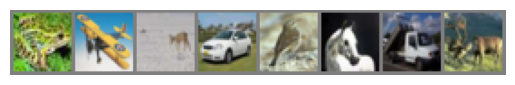

frog  plane deer  car   bird  horse truck deer 


In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

## 5. Define the CNN Architecture

In [5]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128 * 8 * 8, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

model = ConvNet().to(device)

## 6. Define Loss Function and Optimizer

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 7. Training and Testing Functions

In [7]:
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), 100. * correct / total

def test(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), 100. * correct / total

## 8. Train the Model

In [8]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

print("Training started...")
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = test(model, test_loader, criterion, device)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

Training started...
Epoch [1/20]
Train Loss: 1.3669, Train Acc: 51.73%
Test Loss: 1.0212, Test Acc: 64.21%
Epoch [2/20]
Train Loss: 0.9486, Train Acc: 67.19%
Test Loss: 0.7762, Test Acc: 73.15%
Epoch [3/20]
Train Loss: 0.8116, Train Acc: 71.86%
Test Loss: 0.6731, Test Acc: 76.56%
Epoch [4/20]
Train Loss: 0.7189, Train Acc: 74.90%
Test Loss: 0.6274, Test Acc: 78.34%
Epoch [5/20]
Train Loss: 0.6419, Train Acc: 77.95%
Test Loss: 0.6010, Test Acc: 79.39%
Epoch [6/20]
Train Loss: 0.5844, Train Acc: 79.77%
Test Loss: 0.5815, Test Acc: 80.16%
Epoch [7/20]
Train Loss: 0.5358, Train Acc: 81.58%
Test Loss: 0.5490, Test Acc: 81.68%
Epoch [8/20]
Train Loss: 0.4833, Train Acc: 83.28%
Test Loss: 0.5390, Test Acc: 81.86%
Epoch [9/20]
Train Loss: 0.4453, Train Acc: 84.60%
Test Loss: 0.5295, Test Acc: 82.66%
Epoch [10/20]
Train Loss: 0.4134, Train Acc: 85.58%
Test Loss: 0.5083, Test Acc: 83.12%
Epoch [11/20]
Train Loss: 0.3813, Train Acc: 86.77%
Test Loss: 0.5355, Test Acc: 82.33%
Epoch [12/20]
Train L

## 9. Plot Training and Test Results

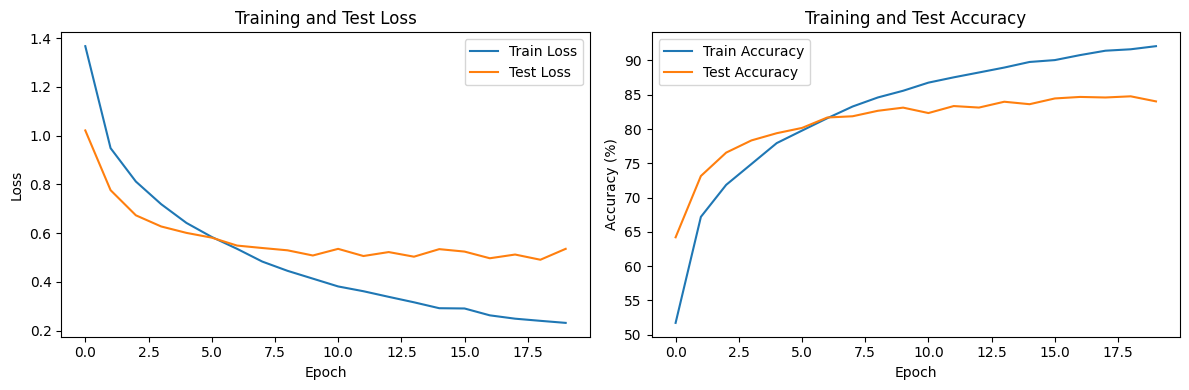

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Test Accuracy')

plt.tight_layout()
plt.show()

## 10. Evaluate on Test Images

Let's visualize some predictions from the test set.

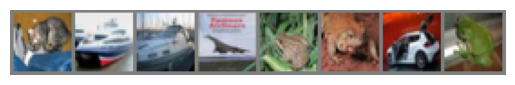

Predicted: cat   ship  ship  plane frog  frog  car   frog 
Actual:    cat   ship  ship  plane frog  frog  car   frog 


In [10]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images and predictions
imshow(torchvision.utils.make_grid(images[:8].cpu()))
print('Predicted:', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))
print('Actual:   ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

## 11. Visualize Prediction Probabilities for Each Class

Let's plot the predicted probabilities for each class for the first few test images.

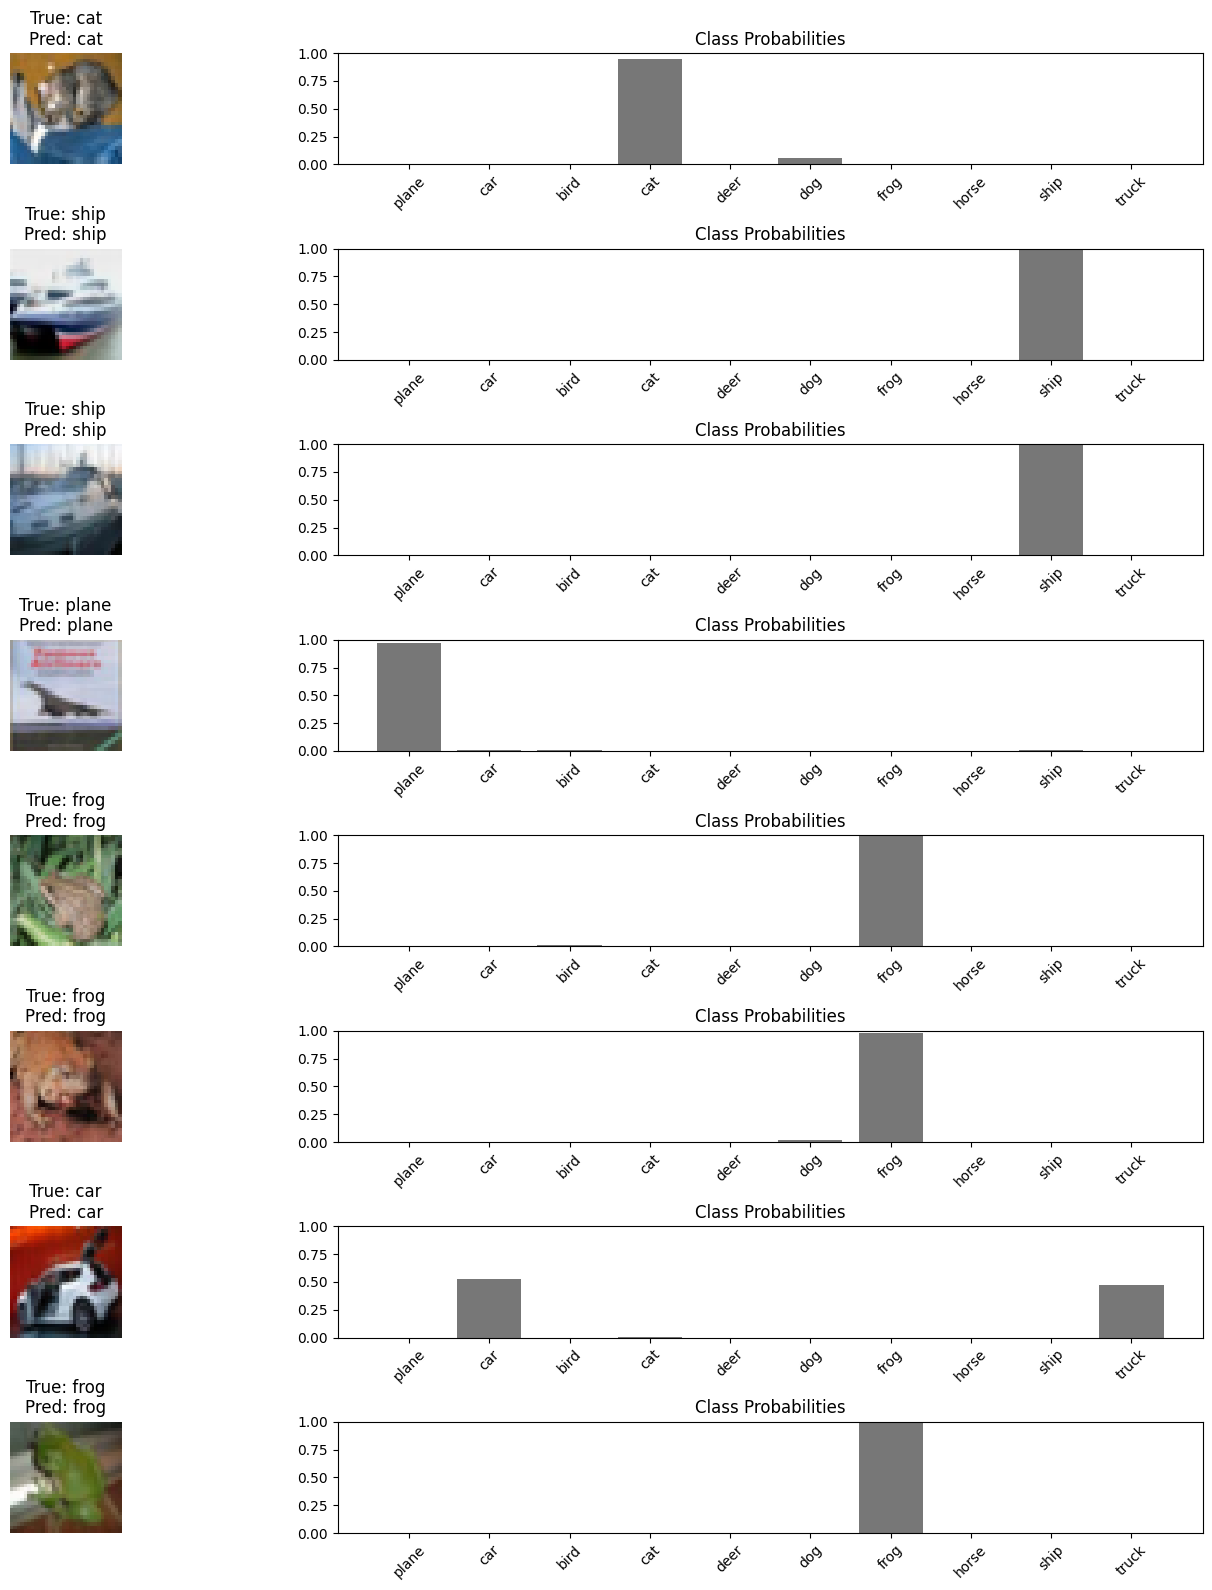

In [11]:
def plot_prediction_probabilities(outputs, labels, classes, num_images=8):
    probs = torch.softmax(outputs, dim=1).cpu().detach().numpy()
    labels = labels.cpu().numpy()
    plt.figure(figsize=(16, 2 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i+1)
        img = images[i].cpu()
        img = img / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')
        plt.title(f"True: {classes[labels[i]]}\nPred: {classes[np.argmax(probs[i])]}")
        plt.subplot(num_images, 2, 2*i+2)
        plt.bar(range(10), probs[i], color="#777777")
        plt.xticks(range(10), classes, rotation=45)
        plt.ylim([0, 1])
        plt.title("Class Probabilities")
        plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_prediction_probabilities(outputs, labels, classes, num_images=8)